In [1]:
from ecnet.datasets import load_cn, load_kv, load_lhv, load_ysi

smiles_cn, cn = load_cn()
smiles_kv, kv = load_kv()
smiles_lhv, lhv = load_lhv()
smiles_ysi, ysi = load_ysi()

print(len(cn), len(kv), len(lhv), len(ysi))

460 213 388 558


In [2]:
from sklearn.model_selection import train_test_split
from ecnet.datasets import QSPRDataset
from ecnet import ECNet
from sklearn.decomposition import PCA
import torch

smiles_train, smiles_test, targets_train, targets_test = train_test_split(smiles_cn, cn, test_size=0.2, random_state=0)

ds_train_cn = QSPRDataset(smiles_train, targets_train, backend='alvadesc')
ds_test_cn = QSPRDataset(smiles_test, targets_test, backend='alvadesc')

pca = PCA()
pca.fit(ds_train_cn.desc_vals.detach().numpy())
ds_train_cn.desc_vals = torch.tensor(pca.transform(ds_train_cn.desc_vals.detach().numpy())).type(torch.float32)
ds_test_cn.desc_vals = torch.tensor(pca.transform(ds_test_cn.desc_vals.detach().numpy())).type(torch.float32)

model_cn = ECNet(ds_train_cn.desc_vals.shape[1], ds_train_cn.target_vals.shape[1], 512, 2)
model_cn.fit(dataset=ds_train_cn, epochs=512, valid_size=0.33, shuffle=True, patience=16, lr=0.001)
model_cn.save('models/cn.pt')

In [3]:
smiles_train, smiles_test, targets_train, targets_test = train_test_split(smiles_kv, kv, test_size=0.2, random_state=0)

ds_train_kv = QSPRDataset(smiles_train, targets_train, backend='alvadesc')
ds_test_kv = QSPRDataset(smiles_test, targets_test, backend='alvadesc')

pca = PCA()
pca.fit(ds_train_kv.desc_vals.detach().numpy())
ds_train_kv.desc_vals = torch.tensor(pca.transform(ds_train_kv.desc_vals.detach().numpy())).type(torch.float32)
ds_test_kv.desc_vals = torch.tensor(pca.transform(ds_test_kv.desc_vals.detach().numpy())).type(torch.float32)

model_kv = ECNet(ds_train_kv.desc_vals.shape[1], ds_train_kv.target_vals.shape[1], 512, 2)
model_kv.fit(dataset=ds_train_kv, epochs=512, valid_size=0.33, shuffle=True, patience=16, lr=0.001)
model_kv.save('models/kv.pt')

In [4]:
smiles_train, smiles_test, targets_train, targets_test = train_test_split(smiles_lhv, lhv, test_size=0.2, random_state=0)

ds_train_lhv = QSPRDataset(smiles_train, targets_train, backend='alvadesc')
ds_test_lhv = QSPRDataset(smiles_test, targets_test, backend='alvadesc')

pca = PCA()
pca.fit(ds_train_lhv.desc_vals.detach().numpy())
ds_train_lhv.desc_vals = torch.tensor(pca.transform(ds_train_lhv.desc_vals.detach().numpy())).type(torch.float32)
ds_test_lhv.desc_vals = torch.tensor(pca.transform(ds_test_lhv.desc_vals.detach().numpy())).type(torch.float32)

model_lhv = ECNet(ds_train_lhv.desc_vals.shape[1], ds_train_lhv.target_vals.shape[1], 512, 2)
model_lhv.fit(dataset=ds_train_lhv, epochs=512, valid_size=0.33, shuffle=True, patience=16, lr=0.001)
model_lhv.save('models/lhv.pt')

In [5]:
smiles_train, smiles_test, targets_train, targets_test = train_test_split(smiles_ysi, ysi, test_size=0.2, random_state=0)

ds_train_ysi = QSPRDataset(smiles_train, targets_train, backend='alvadesc')
ds_test_ysi = QSPRDataset(smiles_test, targets_test, backend='alvadesc')

pca = PCA()
pca.fit(ds_train_ysi.desc_vals.detach().numpy())
ds_train_ysi.desc_vals = torch.tensor(pca.transform(ds_train_ysi.desc_vals.detach().numpy())).type(torch.float32)
ds_test_ysi.desc_vals = torch.tensor(pca.transform(ds_test_ysi.desc_vals.detach().numpy())).type(torch.float32)

model_ysi = ECNet(ds_train_ysi.desc_vals.shape[1], ds_train_ysi.target_vals.shape[1], 512, 2)
model_ysi.fit(dataset=ds_train_ysi, epochs=512, valid_size=0.33, shuffle=True, patience=16, lr=0.001)
model_ysi.save('models/ysi.pt')

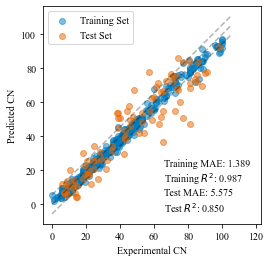

In [6]:
from sklearn.metrics import median_absolute_error, r2_score
from matplotlib import pyplot as plt
from matplotlib.offsetbox import AnchoredText

preds_train_cn = model_cn(ds_train_cn.desc_vals).detach().numpy()
preds_test_cn = model_cn(ds_test_cn.desc_vals).detach().numpy()

exp_train_cn = ds_train_cn.target_vals.detach().numpy()
exp_test_cn = ds_test_cn.target_vals.detach().numpy()

mae_train = median_absolute_error(exp_train_cn, preds_train_cn)
mae_test = median_absolute_error(exp_test_cn, preds_test_cn)

r2_train = r2_score(exp_train_cn, preds_train_cn)
r2_test = r2_score(exp_test_cn, preds_test_cn)

min_val = min(exp_train_cn) - 0.05 * min(exp_train_cn)
max_val = max(exp_train_cn) + 0.05 * max(exp_train_cn)

plt.clf()
plt.rcParams['font.family'] = 'Times New Roman'
plt.xlabel('Experimental CN')
plt.ylabel('Predicted CN')
plt.plot([min_val, max_val], [min_val, max_val], 'k--', alpha=0.3)
plt.plot([min_val, max_val], [min_val + mae_test, max_val + mae_test], 'k--', alpha=0.3)
plt.plot([min_val, max_val], [min_val - mae_test, max_val - mae_test], 'k--', alpha=0.3)
plt.scatter(exp_train_cn, preds_train_cn, color=(0, 114/235, 178/235), alpha=0.5, marker='o', label='Training Set')
plt.scatter(exp_test_cn, preds_test_cn, color=(213/235, 94/235, 0), alpha=0.5, marker='o', label='Test Set')
plt.legend(loc='upper left')
string = 'Training MAE: {:.3f}\nTraining $R^2$: {:.3f}\nTest MAE: {:.3f}\nTest $R^2$: {:.3f}'.format(
    mae_train, r2_train, mae_test, r2_test
)
text_box = AnchoredText(string, frameon=True, loc=4, pad=0.5)
plt.setp(text_box.patch, facecolor='white', edgecolor='white', alpha=0.0)
plt.gca().add_artist(text_box)
plt.axis('square')
plt.show()

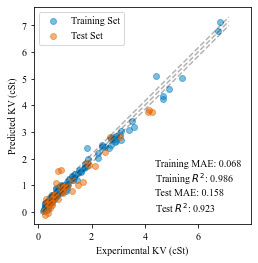

In [7]:
preds_train_kv = model_kv(ds_train_kv.desc_vals).detach().numpy()
preds_test_kv = model_kv(ds_test_kv.desc_vals).detach().numpy()

exp_train_kv = ds_train_kv.target_vals.detach().numpy()
exp_test_kv = ds_test_kv.target_vals.detach().numpy()

mae_train = median_absolute_error(exp_train_kv, preds_train_kv)
mae_test = median_absolute_error(exp_test_kv, preds_test_kv)

r2_train = r2_score(exp_train_kv, preds_train_kv)
r2_test = r2_score(exp_test_kv, preds_test_kv)

min_val = min(exp_train_kv) - 0.05 * min(exp_train_kv)
max_val = max(exp_train_kv) + 0.05 * max(exp_train_kv)

plt.clf()
plt.rcParams['font.family'] = 'Times New Roman'
plt.xlabel('Experimental KV (cSt)')
plt.ylabel('Predicted KV (cSt)')
plt.plot([min_val, max_val], [min_val, max_val], 'k--', alpha=0.3)
plt.plot([min_val, max_val], [min_val + mae_test, max_val + mae_test], 'k--', alpha=0.3)
plt.plot([min_val, max_val], [min_val - mae_test, max_val - mae_test], 'k--', alpha=0.3)
plt.scatter(exp_train_kv, preds_train_kv, color=(0, 114/235, 178/235), alpha=0.5, marker='o', label='Training Set')
plt.scatter(exp_test_kv, preds_test_kv, color=(213/235, 94/235, 0), alpha=0.5, marker='o', label='Test Set')
plt.legend(loc='upper left')
string = 'Training MAE: {:.3f}\nTraining $R^2$: {:.3f}\nTest MAE: {:.3f}\nTest $R^2$: {:.3f}'.format(
    mae_train, r2_train, mae_test, r2_test
)
text_box = AnchoredText(string, frameon=True, loc=4, pad=0.5)
plt.setp(text_box.patch, facecolor='white', edgecolor='white', alpha=0.0)
plt.gca().add_artist(text_box)
plt.axis('square')
plt.show()

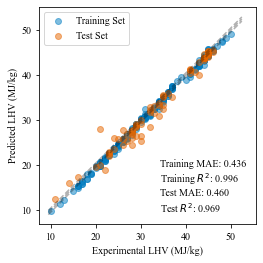

In [8]:
preds_train_lhv = model_lhv(ds_train_lhv.desc_vals).detach().numpy()
preds_test_lhv = model_lhv(ds_test_lhv.desc_vals).detach().numpy()

exp_train_lhv = ds_train_lhv.target_vals.detach().numpy()
exp_test_lhv = ds_test_lhv.target_vals.detach().numpy()

mae_train = median_absolute_error(exp_train_lhv, preds_train_lhv)
mae_test = median_absolute_error(exp_test_lhv, preds_test_lhv)

r2_train = r2_score(exp_train_lhv, preds_train_lhv)
r2_test = r2_score(exp_test_lhv, preds_test_lhv)

min_val = min(exp_train_lhv) - 0.05 * min(exp_train_lhv)
max_val = max(exp_train_lhv) + 0.05 * max(exp_train_lhv)

plt.clf()
plt.rcParams['font.family'] = 'Times New Roman'
plt.xlabel('Experimental LHV (MJ/kg)')
plt.ylabel('Predicted LHV (MJ/kg)')
plt.plot([min_val, max_val], [min_val, max_val], 'k--', alpha=0.3)
plt.plot([min_val, max_val], [min_val + mae_test, max_val + mae_test], 'k--', alpha=0.3)
plt.plot([min_val, max_val], [min_val - mae_test, max_val - mae_test], 'k--', alpha=0.3)
plt.scatter(exp_train_lhv, preds_train_lhv, color=(0, 114/235, 178/235), alpha=0.5, marker='o', label='Training Set')
plt.scatter(exp_test_lhv, preds_test_lhv, color=(213/235, 94/235, 0), alpha=0.5, marker='o', label='Test Set')
plt.legend(loc='upper left')
string = 'Training MAE: {:.3f}\nTraining $R^2$: {:.3f}\nTest MAE: {:.3f}\nTest $R^2$: {:.3f}'.format(
    mae_train, r2_train, mae_test, r2_test
)
text_box = AnchoredText(string, frameon=True, loc=4, pad=0.5)
plt.setp(text_box.patch, facecolor='white', edgecolor='white', alpha=0.0)
plt.gca().add_artist(text_box)
plt.axis('square')
plt.show()

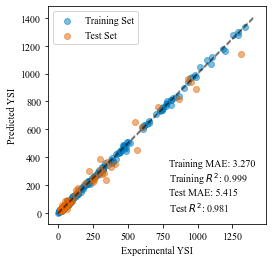

In [9]:
preds_train_ysi = model_ysi(ds_train_ysi.desc_vals).detach().numpy()
preds_test_ysi = model_ysi(ds_test_ysi.desc_vals).detach().numpy()

exp_train_ysi = ds_train_ysi.target_vals.detach().numpy()
exp_test_ysi = ds_test_ysi.target_vals.detach().numpy()

mae_train = median_absolute_error(exp_train_ysi, preds_train_ysi)
mae_test = median_absolute_error(exp_test_ysi, preds_test_ysi)

r2_train = r2_score(exp_train_ysi, preds_train_ysi)
r2_test = r2_score(exp_test_ysi, preds_test_ysi)

min_val = min(exp_train_ysi) - 0.05 * min(exp_train_ysi)
max_val = max(exp_train_ysi) + 0.05 * max(exp_train_ysi)

plt.clf()
plt.rcParams['font.family'] = 'Times New Roman'
plt.xlabel('Experimental YSI')
plt.ylabel('Predicted YSI')
plt.plot([min_val, max_val], [min_val, max_val], 'k--', alpha=0.3)
plt.plot([min_val, max_val], [min_val + mae_test, max_val + mae_test], 'k--', alpha=0.3)
plt.plot([min_val, max_val], [min_val - mae_test, max_val - mae_test], 'k--', alpha=0.3)
plt.scatter(exp_train_ysi, preds_train_ysi, color=(0, 114/235, 178/235), alpha=0.5, marker='o', label='Training Set')
plt.scatter(exp_test_ysi, preds_test_ysi, color=(213/235, 94/235, 0), alpha=0.5, marker='o', label='Test Set')
plt.legend(loc='upper left')
string = 'Training MAE: {:.3f}\nTraining $R^2$: {:.3f}\nTest MAE: {:.3f}\nTest $R^2$: {:.3f}'.format(
    mae_train, r2_train, mae_test, r2_test
)
text_box = AnchoredText(string, frameon=True, loc=4, pad=0.5)
plt.setp(text_box.patch, facecolor='white', edgecolor='white', alpha=0.0)
plt.gca().add_artist(text_box)
plt.axis('square')
plt.show()